In [132]:
import os
import csv
import json
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [133]:
eeci_colors = ['#E50068','#574145','#009070','#7500a0','#ffbfeb','#00C8A4','#a800e5','#4d4e51','#BEA5A9','#ebf1f7']

In [134]:
with open(os.path.join('..','data','analysis','changepoint','single_changepoints.json'),'r') as json_file:
    single_changepoints = json.load(json_file)['data']
with open(os.path.join('..','data','analysis','changepoint','multiple_changepoints.json'),'r') as json_file:
    multiple_changepoints = json.load(json_file)['data']

In [135]:
results_file = os.path.join('..','results', 'prediction_tests_changepoint.csv')
results = pd.read_csv(results_file)

In [136]:
UCam_ids = [0,3,9,11,12,15,16,25,26,32,38,44,45,48,49]
metric = 'gmnRMSE'
metric_name = 'nRMSE'
print(results)

                        Model Name   Train Building  Forecast Time (s)  \
0    linear_b0-cp-baseline-cp_None  same-train-test           5.539095   
1    linear_b0-cp-baseline-cp_None  same-train-test           5.539095   
2    linear_b3-cp-baseline-cp_None  same-train-test           5.582361   
3    linear_b3-cp-baseline-cp_None  same-train-test           5.582361   
4    linear_b9-cp-baseline-cp_None  same-train-test           5.481632   
..                             ...              ...                ...   
117  linear_b44-mcp2-cp_2012-07-27  same-train-test           5.591791   
118  linear_b44-mcp3-cp_2014-01-19  same-train-test           5.587590   
119  linear_b44-mcp3-cp_2014-01-19  same-train-test           5.587590   
120  linear_b44-mcp4-cp_2016-02-23  same-train-test           5.615703   
121  linear_b44-mcp4-cp_2016-02-23  same-train-test           5.615703   

     Tau (hrs)   Metric     P     C     S                   L0  \
0           48   gmnMAE  None  None  None  0.

In [137]:
# get baseline results (7yr train, 1yr validate) from csv
baseline_results_RMSE = [float(results[(results['Model Name'].str.contains('baseline')) & (results['Metric']==metric)].iloc[i]['L%s'%b_id]) for i,b_id in enumerate(UCam_ids)]
print(baseline_results_RMSE)

[0.08091475815411756, 0.18384269216555013, 0.27500184523817506, 0.112062272966196, 0.12352216410125277, 0.27469925085733876, 0.28962153476865793, 0.13593981642628308, 0.050155205803624196, 0.16985041972234347, 0.1724543475373685, 0.0864213229778555, 0.11865811533989978, 0.11092638626296844, 0.5155570185144114]


In [138]:
# get single changepoint results from csv
scp_results_RMSE = []
for i, b_id in enumerate(UCam_ids):
    if single_changepoints[str(b_id)] is not None:
        scp_results_RMSE.append(float(results[(results['Model Name'].str.contains('scp')) & (results['Metric']==metric) & (results['Model Name'].str.contains('b%s'%b_id))]['L%s'%b_id].iloc[0]))
    else:
        scp_results_RMSE.append(None)
print(scp_results_RMSE)

[0.07323138109937541, 0.16094855984684234, 0.2660540099255216, 0.11272941210095806, 0.13008785727125316, 0.2725527010349301, None, 0.12011159353588961, None, 0.16610303353400738, 0.1526833980302715, 0.08546524955957363, 0.11589606509244728, 0.10725814299978256, 0.5609713072021055]


In [139]:
screened_baselines = np.array(baseline_results_RMSE)[np.where(~np.isnan(np.array(scp_results_RMSE, dtype=float)))]
scp_improvements = np.array(baseline_results_RMSE) - np.array(scp_results_RMSE, dtype=float)
print(scp_improvements)
mean_scp_improvement = np.nanmean(scp_improvements)
print(mean_scp_improvement)
print(np.mean(screened_baselines))
print(mean_scp_improvement/np.mean(screened_baselines))

[ 0.00768338  0.02289413  0.00894784 -0.00066714 -0.00656569  0.00214655
         nan  0.01582822         nan  0.00374739  0.01977095  0.00095607
  0.00276205  0.00366824 -0.04541429]
0.0027505922331386348
0.1815269546356739
0.015152527836205352


In [140]:
# get multiple changepoint results from csv
mcp_buildings = [int(v) for v in multiple_changepoints.keys()]
mcp_cp_dates = {b_id: sorted([multiple_changepoints[str(b_id)][i]['date'] for i in range(len(multiple_changepoints[str(b_id)]))]) for b_id in mcp_buildings}

mcp_results = {b_id: results[(results['Model Name'].str.contains('mcp')) & (results['Metric']==metric) & (results['Model Name'].str.contains('b%s'%b_id))]['L%s'%b_id].to_numpy(dtype=float) for b_id in mcp_buildings}
print(mcp_results)

{9: array([0.26221843, 0.25872957, 0.2587506 , 0.26363832, 0.31799563]), 12: array([0.12932428, 0.12441003, 0.12444466]), 15: array([0.27234188, 0.26676482, 0.2710946 , 0.26818725, 0.26709255]), 16: array([0.28968325, 0.28957378, 0.28364429, 0.27635729, 0.28286747]), 25: array([0.12143102, 0.12038336, 0.12477552, 0.12375678, 0.12045079]), 26: array([0.04876373, 0.05252877, 0.05098595, 0.04954254, 0.049625  ]), 44: array([0.08182314, 0.0819201 , 0.08354466, 0.08323818, 0.08729299])}


['2010-10-01', '2011-11-19', '2013-04-08', '2014-05-02', '2016-06-15']
['2013-06-18', '2014-06-13', '2015-07-15']
['2010-10-23', '2012-01-30', '2014-01-19', '2015-02-10', '2016-02-17']
['2011-10-31', '2012-05-02', '2014-02-04', '2015-10-18', '2016-05-09']
['2011-06-28', '2012-03-18', '2013-07-16', '2014-07-04', '2015-01-24']
['2011-01-09', '2012-07-13', '2013-05-15', '2014-04-29', '2016-02-18']
['2010-08-20', '2011-07-20', '2012-07-27', '2014-01-19', '2016-02-23']


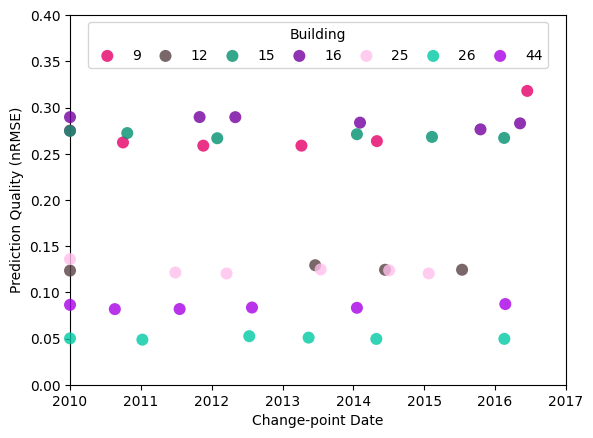

In [155]:
# plot multiple changepoint results
fig, ax = plt.subplots()
for i,b_id in enumerate(mcp_buildings):
    ax.scatter(
        [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in (['2010-01-01'] + mcp_cp_dates[b_id])],
        [baseline_results_RMSE[UCam_ids.index(b_id)]] + list(mcp_results[b_id]),
        label=b_id,
        zorder=i+10, clip_on=False,
        color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
    )
    print(mcp_cp_dates[b_id])
plt.xlim(*[dt.datetime.strptime(d,'%Y-%m-%d').date() for d in ['2010-01-01','2017-01-01']])
plt.ylim(0,0.4)
plt.xlabel('Change-point Date')
plt.ylabel(f'Prediction Quality ({metric_name})')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=7, fancybox=True, title='Building', columnspacing=0.75)
plt.show()

['2010-10-01', '2011-11-19', '2013-04-08', '2014-05-02', '2016-06-15']
['2013-06-18', '2014-06-13', '2015-07-15']
['2010-10-23', '2012-01-30', '2014-01-19', '2015-02-10', '2016-02-17']
['2011-10-31', '2012-05-02', '2014-02-04', '2015-10-18', '2016-05-09']
['2011-06-28', '2012-03-18', '2013-07-16', '2014-07-04', '2015-01-24']
['2011-01-09', '2012-07-13', '2013-05-15', '2014-04-29', '2016-02-18']
['2010-08-20', '2011-07-20', '2012-07-27', '2014-01-19', '2016-02-23']


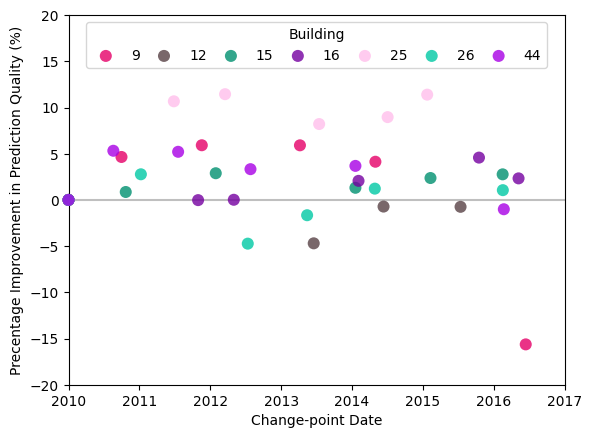

In [169]:
# plot changepoint results in percentage form
# plot multiple changepoint results
fig, ax = plt.subplots()
ax.hlines([0],dt.datetime.strptime('2010-01-01','%Y-%m-%d'),dt.datetime.strptime('2017-01-01','%Y-%m-%d'), color='k', alpha=0.25)
for i,b_id in enumerate(mcp_buildings):
    ax.scatter(
        [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in (['2010-01-01'] + mcp_cp_dates[b_id])],
        (1 - np.array([baseline_results_RMSE[UCam_ids.index(b_id)]] + list(mcp_results[b_id]))/baseline_results_RMSE[UCam_ids.index(b_id)])*100,
        label=b_id,
        zorder=i+10, clip_on=False,
        color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
    )
    print(mcp_cp_dates[b_id])
plt.xlim(*[dt.datetime.strptime(d,'%Y-%m-%d').date() for d in ['2010-01-01','2017-01-01']])
plt.ylim(-20,20)
plt.xlabel('Change-point Date')
plt.ylabel('Precentage Improvement in Prediction Quality (%)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=7, fancybox=True, title='Building', columnspacing=0.75)
plt.show()